## Import libraries¶

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## import train dataset

In [2]:
train=pd.read_csv('D:\\tableau\\First_Model\\train_v9rqX0R.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## remove the least necessary columns

In [3]:
train=train.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Find the missing values

In [4]:
train.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Here the columns (Item_Weight and Outlet_Size) have missing values . In order to fill the missing values,¶

## 1. For Item_Weight , missing values are filled using the mean of that column.

## 2. For Outlet_Size , missing values are filled using the most occured size of that column.

In [5]:
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [6]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
train['Outlet_Size']=train['Outlet_Size'].fillna('Medium')
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
data=train.copy()

## Convert the Categorical values to numerical values

In [9]:
le=LabelEncoder()
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Item_Type']=le.fit_transform(data['Item_Type'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']=le.fit_transform(data['Outlet_Type'])
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


## Find the outliers

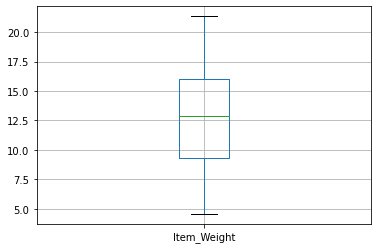

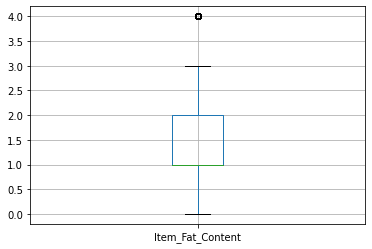

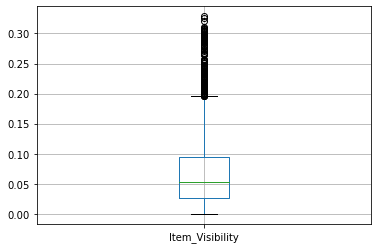

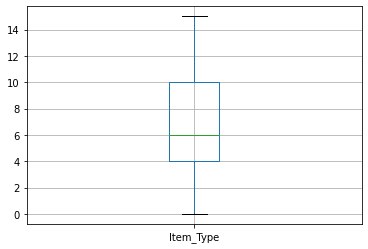

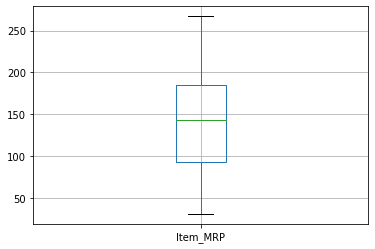

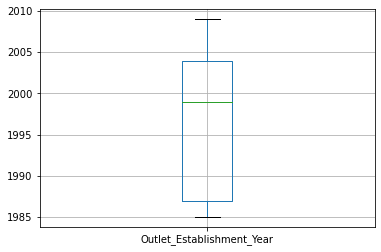

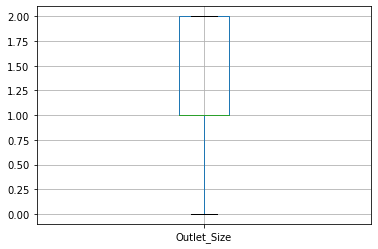

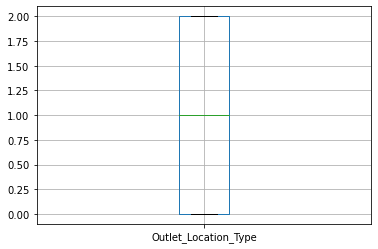

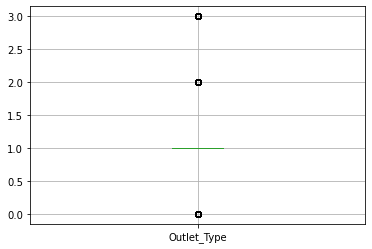

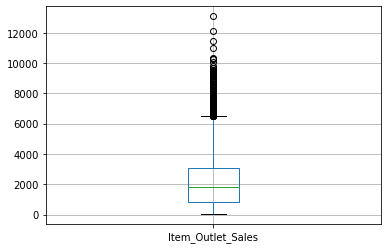

<Figure size 432x288 with 0 Axes>

In [10]:
for columns in data:
    data.boxplot([columns])
    plt.figure()

## The columns (Item_Visibility and Item_Fat_Content ) , there are some values which are greater than 0.18 and 4 respectively. Filter those values

In [11]:
data=data.loc[data['Item_Visibility']<0.18]
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [12]:
data=data.loc[data['Item_Fat_Content']<4]
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [13]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000
mean,12.870269,1.331867,0.061796,7.239335,141.136516,1997.947684,1.163672,1.117467,1.227967,2224.757068
std,4.244958,0.567668,0.044700,4.195081,62.183497,8.358206,0.600514,0.807674,0.787109,1705.216292
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,1.000000,0.026569,4.000000,94.143600,1987.000000,1.000000,0.000000,1.000000,886.845600
50%,12.857645,1.000000,0.052150,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000,1844.266000
75%,16.100000,2.000000,0.090449,10.000000,185.758200,2004.000000,2.000000,2.000000,1.000000,3135.918000
max,21.350000,3.000000,0.179807,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000,13086.964800


In [14]:
correlation=data.corr()
correlation

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021615,-0.004585,0.026444,0.025018,-0.008054,-0.008479,0.006707,-0.003715,0.008242
Item_Fat_Content,-0.021615,1.000000,0.041645,-0.123450,0.004742,-0.010924,-0.009815,-0.001579,0.003302,0.021707
Item_Visibility,-0.004585,0.041645,1.000000,-0.034750,0.003659,-0.023496,0.031459,-0.011480,-0.082496,-0.063197
Item_Type,0.026444,-0.123450,-0.034750,1.000000,0.027795,0.006490,0.001724,-0.000686,0.000690,0.015476
Item_MRP,0.025018,0.004742,0.003659,0.027795,1.000000,0.005916,0.002800,0.005736,-0.003147,0.576150
Outlet_Establishment_Year,-0.008054,-0.010924,-0.023496,0.006490,0.005916,1.000000,0.222861,-0.118175,-0.156917,-0.070156
Outlet_Size,-0.008479,-0.009815,0.031459,0.001724,0.002800,0.222861,1.000000,-0.607767,-0.189644,-0.076716
Outlet_Location_Type,0.006707,-0.001579,-0.011480,-0.000686,0.005736,-0.118175,-0.607767,1.000000,0.481116,0.091245
Outlet_Type,-0.003715,0.003302,-0.082496,0.000690,-0.003147,-0.156917,-0.189644,0.481116,1.000000,0.383471
Item_Outlet_Sales,0.008242,0.021707,-0.063197,0.015476,0.576150,-0.070156,-0.076716,0.091245,0.383471,1.000000


<AxesSubplot:>

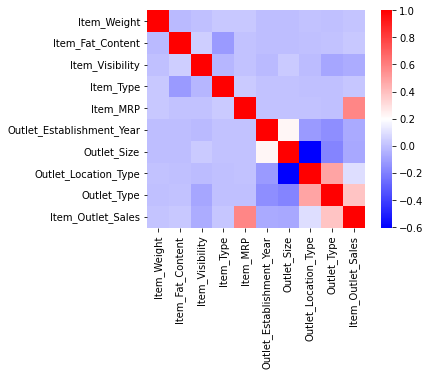

In [15]:
sns.heatmap(data=correlation,square=True,cmap='bwr')

## Analysis

## 1. find which content of Fat is more in the column (Item_Fat_Content)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

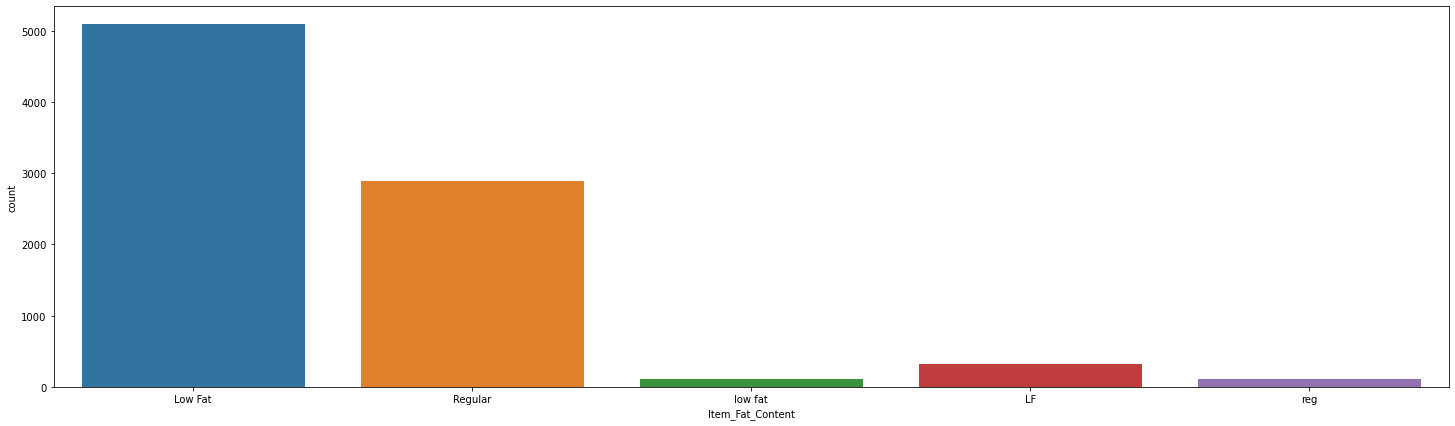

In [16]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Fat_Content',data=train)

## Here Low fat content is the most occured fat content (5089)

## 2. find which Item is more in the column (Item_Type)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

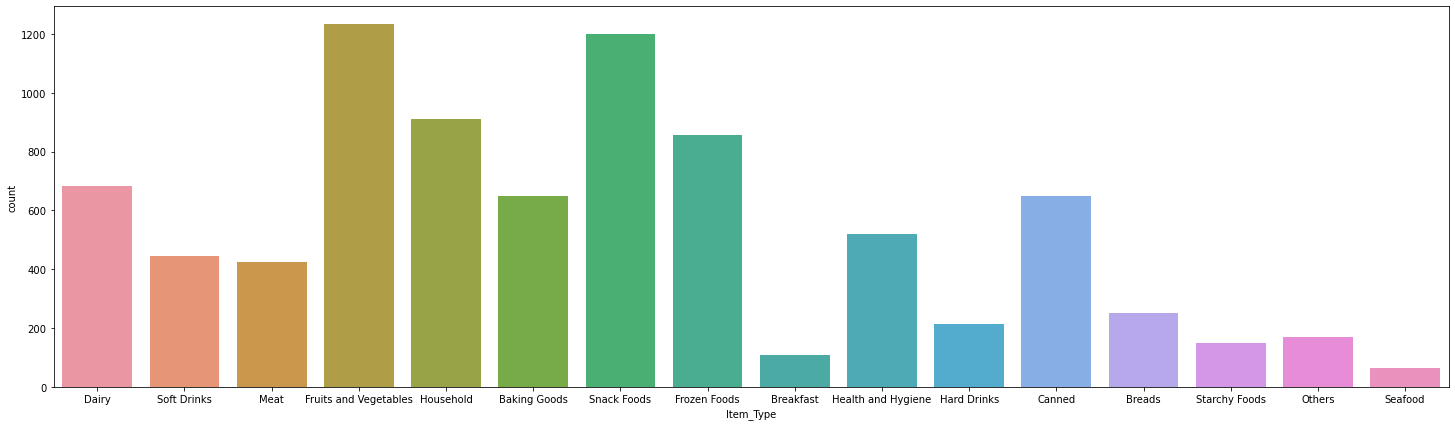

In [17]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train)

## Here Fruits and Vegetables are the most occured Item(1232)

## 3. find which size is more in the column (Outlet_Type)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

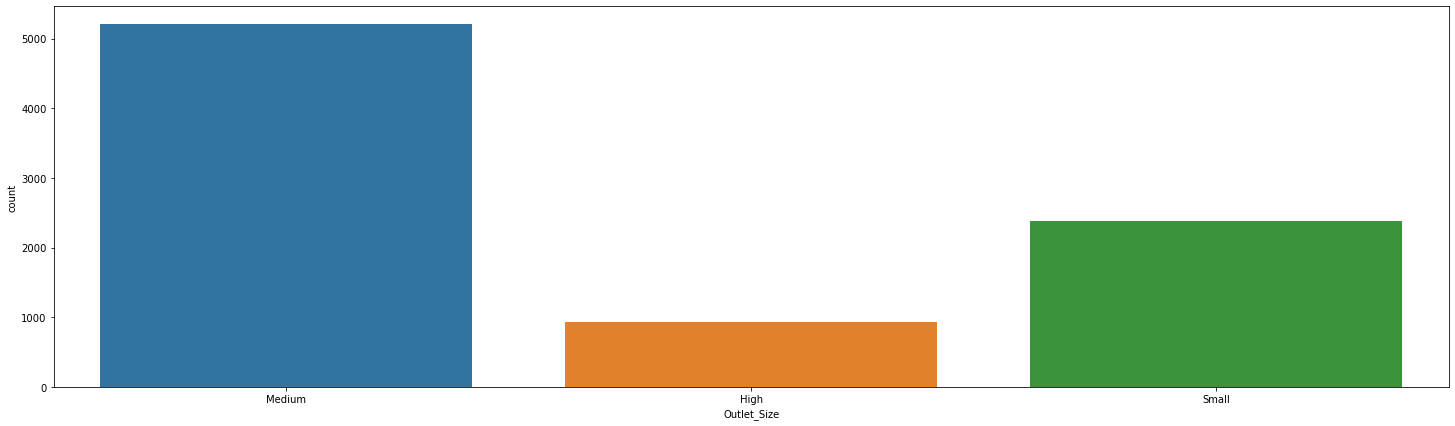

In [18]:
plt.figure(figsize=(25,7))
sns.countplot('Outlet_Size',data=train)

## Here the Medium is the most occured outlet size(5203)

## 4. Find which Tier is more in the column(Outlet_Location_Type)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

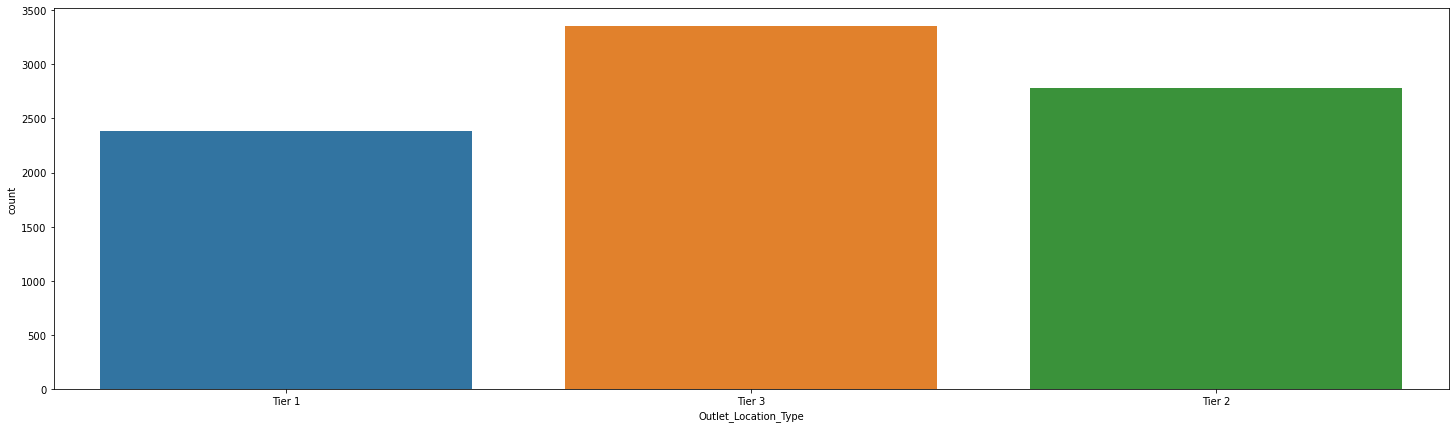

In [19]:
plt.figure(figsize=(25,7))
sns.countplot('Outlet_Location_Type',data=train)

## Here the Tier 3 is the most occured(3350)

## 5. find which store type is more in the column (Outlet_Type)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

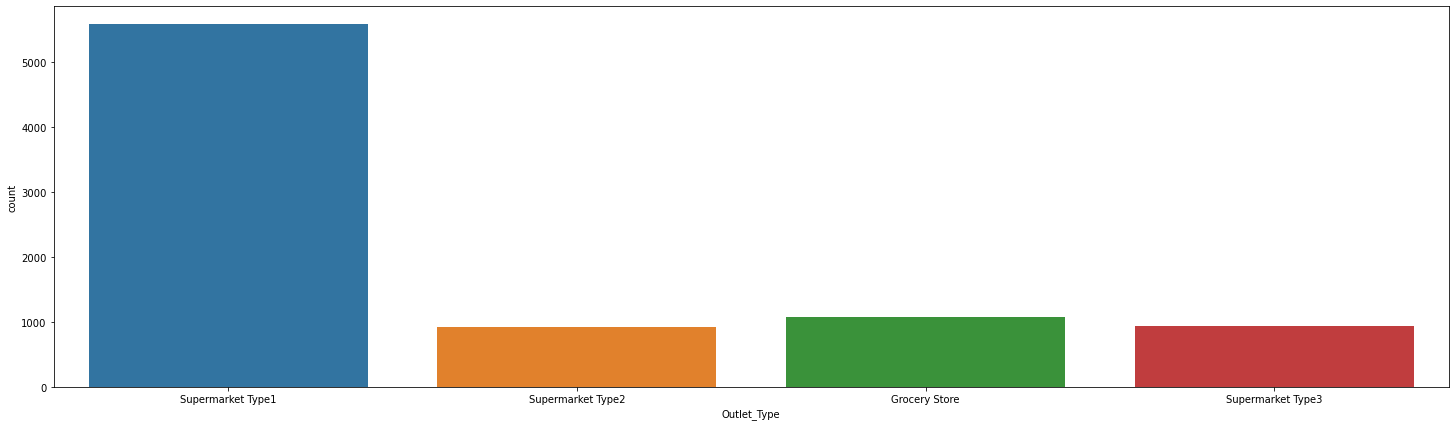

In [20]:
plt.figure(figsize=(25,7))
sns.countplot('Outlet_Type',data=train)

## Here the Supermarket Type 1 is the most occured store(5577)

## Model Building

## 1. For this project , 5 models are used - linear regression , Ridge regression, Lasso regression , decision tree regression and Random Forest regression .

## 2. There are 3 procedures followed for the 3 models - train , validate and Predict .

## 3. Train-Test-Split is used on train dataset with a test size of 0.3 and random state of 4 . Using that split , models are subjected for training and validation.

## 4. Adjusted r2_score and RMSE are used as evaluating Metrics .

In [21]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=4)

In [22]:
lin=LinearRegression()
ridge=Ridge()
lasso=Lasso()
dec=DecisionTreeRegressor(max_depth=40)
ran=RandomForestRegressor(max_depth=40)

In [23]:
def adjusted_r2(r,n,p):
    return ((r-(p/(n-1)))*((n-1)/(n-p-1)))

## 1. Linear Regression

In [24]:
lin.fit(xtrain,ytrain)
pred1=lin.predict(xtest)
r1=r2_score(pred1,ytest)
a1=(adjusted_r2(r1,8181,9))
b1=(sqrt(mean_squared_error(pred1,ytest)))

## 2. Ridge Regression

In [25]:
ridge.fit(xtrain,ytrain)
pred2=ridge.predict(xtest)
r2=r2_score(pred2,ytest)
a2=(adjusted_r2(r2,8181,9))
b2=(sqrt(mean_squared_error(pred2,ytest)))

## 3. Lasso Regression

In [26]:
lasso.fit(xtrain,ytrain)
pred3=lasso.predict(xtest)
r3=r2_score(pred3,ytest)
a3=(adjusted_r2(r3,8181,9))
b3=(sqrt(mean_squared_error(pred3,ytest)))

## 4.  Decision Tree Regression

In [27]:
dec.fit(xtrain,ytrain)
pred4=dec.predict(xtest)
r4=r2_score(pred4,ytest)
a4=(adjusted_r2(r4,8181,9))
b4=(sqrt(mean_squared_error(pred4,ytest)))

## 5. Random Forest Regression

In [28]:
ran.fit(xtrain,ytrain)
pred5=ran.predict(xtest)
r5=r2_score(pred5,ytest)
a5=(adjusted_r2(r5,8181,9))
b5=(sqrt(mean_squared_error(pred5,ytest)))

In [29]:
results = [['Linear regression', a1 , b1],['Ridge Regression',a2,b2],['Lasso Regression',a3,b3], ['Decision Tree Regression',a4,b4], ['Random Forest Regression',a5,b5]]
results = pd.DataFrame(results, columns=['regression models', 'adjusted r2 score','rmse'])
results

,regression models,adjusted r2 score,rmse
0,Linear regression,-0.000570,1206.268456
1,Ridge Regression,-0.001192,1206.293286
2,Lasso Regression,-0.004788,1206.593018
3,Decision Tree Regression,0.181377,1612.615116
4,Random Forest Regression,0.298755,1168.284519


## Import the given test dataset. Use the test Dataset in the models for prediction

In [30]:
test=pd.read_csv('D:\\tableau\\First_Model\\test_AbJTz2l.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [31]:
test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,NaN,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,NaN,Tier 2,Supermarket Type1


In [32]:
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())
test['Outlet_Size'].value_counts()
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [33]:
test['Item_Fat_Content']=le.fit_transform(test['Item_Fat_Content'])
test['Item_Type']=le.fit_transform(test['Item_Type'])
test['Outlet_Size']=le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type']=le.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type']=le.fit_transform(test['Outlet_Type'])

In [34]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1


In [35]:
Pred1=lin.predict(test)
Pred2=ridge.predict(test)
Pred3=lasso.predict(test)
Pred4=dec.predict(test)
Pred5=ran.predict(test)

## attach the predicted values as the columns of test dataset

In [36]:
test['lin predict']=Pred1
test['rid predict']=Pred2
test['las predict']=Pred3
test['dec predict']=Pred4
test['ran predict']=Pred5

In [37]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,lin predict,rid predict,las predict,dec predict,ran predict
0,20.750000,1,0.007565,13,107.8622,1999,1,0,1,2008.087134,2003.931345,1978.858121,1693.7952,1705.340172
1,8.300000,4,0.038428,4,87.3198,2007,1,1,1,1387.889447,1385.372171,1362.330989,959.4178,1163.911612
2,14.600000,1,0.099575,11,241.7538,1998,1,2,0,2228.012980,2231.197337,2252.292033,484.7024,764.205240
3,7.315000,1,0.015388,13,155.0340,2007,1,1,1,2360.566700,2357.220164,2338.269073,612.5360,1616.029760
4,12.695633,2,0.118599,4,234.2300,1985,1,2,3,5142.132499,5146.392344,5169.137284,6705.2718,6976.332296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,2,0.013496,13,141.3154,1997,2,0,1,2261.764891,2257.940473,2235.422322,1438.1280,2229.597750
5677,7.600000,2,0.142991,15,169.1448,2009,1,2,2,3057.849606,3064.562346,3099.729681,1336.9264,2621.467656
5678,10.000000,1,0.073529,8,118.7440,2002,1,1,1,1727.935061,1728.996898,1734.534147,2756.4120,1940.234412
5679,15.300000,2,0.000000,3,214.6218,2007,1,1,1,3384.599544,3379.469235,3348.249047,7247.2330,4994.172458
